## The Housing Pricing Project

This Project will analyse the housing prices over the 10 years of data. First we will focus on the year 2008 with the financial crash and visualise the prices. Then analyse the prices over each month and year before looking into the correlation of each attribute within the data set. To look at specific statistics that help understand the different variables in housing prices. 

This data set is available from Kaggel at: https://www.kaggle.com/htagholdings/property-sales?select=raw_sales.csv

### Explore the Data 

We will begin the project by loading the relevant packages, reading the data set and viewing the first few lines of the data. 

In [13]:
#import the relevant packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

#read the data set and name it housing
housing = pd.read_csv('raw_sales.csv.zip')

#show the first few lines of data
housing.head()


,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


### Pre Process the Data

We will preprocess the data set to apply one hot encoding and set the index to the date. 

In [14]:
# Print the data type of each column in housing
print(housing.dtypes)

# Transform the propertyType column
housing['propertyType']= pd.get_dummies(housing['propertyType'])

# Transform the postcode column
housing['postcode']= pd.get_dummies(housing['postcode'])

# Convert the date column to a datestamp type
housing['dateSold'] = pd.to_datetime(housing['datesold'])

# Print the data type of each column in housing, again
print(housing.dtypes)

# Check the number of missing values in each column
print(housing.isnull().sum())

# Set the date column as the index of your DataFrame housing
housing = housing.set_index('dateSold')

#check the first few rows again
housing.head()

datesold        object
postcode         int64
price            int64
propertyType    object
bedrooms         int64
dtype: object
datesold                object
postcode                 uint8
price                    int64
propertyType             uint8
bedrooms                 int64
dateSold        datetime64[ns]
dtype: object
datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
dateSold        0
dtype: int64


,datesold,postcode,price,propertyType,bedrooms
dateSold,,,,,
2007-02-07,2007-02-07 00:00:00,0,525000,1,4
2007-02-27,2007-02-27 00:00:00,0,290000,1,3
2007-03-07,2007-03-07 00:00:00,0,328000,1,3
2007-03-09,2007-03-09 00:00:00,0,380000,1,4
2007-03-21,2007-03-21 00:00:00,0,310000,1,3


### Visualise the Data

We will first look into the housing prices over time in a plot below.

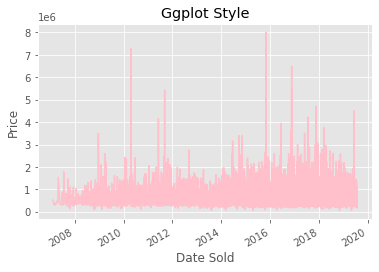

In [15]:
# apply the ggplot style
plt.style.use('ggplot')

# plot the time series
ax = housing['price'].plot(color='pink')

# specify the x-axis label 
ax.set_xlabel('Date Sold')

# specify the y-axis label 
ax.set_ylabel('Price')

# set the title
ax.set_title('Ggplot Style')

# show plot
plt.show()


From the plot above we can see that the data contains house prices per year spanning over 10 years. To understand the data set further we will focus on a significant event during the housing market crash in 2008 and the financial crash.

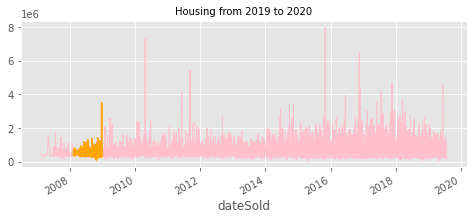

In [16]:
# plot a line chart of the housing DataFrame using the specified arguments
ax = housing['price'].plot(color='pink', figsize=(8, 3), linewidth=1, fontsize=6)

# specify the title 
ax.set_title('Housing from 2019 to 2020', fontsize=10)

# select the subset of data between 2008 and 2009
housingCrash = housing['price']['2008-02-07 00:00:00':'2009-01-04 00:00:00']

# plot the time series as an orange area chart
ax = housingCrash.plot(color='orange', fontsize=10)

# show plot
plt.show()

We will then focus the plot on the year from the earliest data in 2008 and the earliest date in 2009 below.

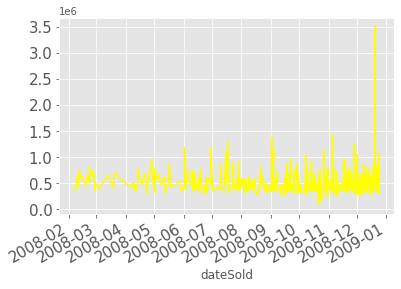

In [17]:
# select the subset of data between 2008 and 2009
housingCrashFocused = housing['price']['2008-02-07 00:00:00':'2009-01-04 00:00:00']

# plot the time series as a yellow area chart
ax = housingCrashFocused.plot(color='yellow', fontsize=15)

# show plot
plt.show()

We can clearly see a considerable spike in prices at the end of the year. Below we will pinpoint the specific date in the  2008 stock market crash took place on Sept. 29, 2008, when the Dow Jones Industrial Average fell 777.68 percent. This is represented with the red line below.

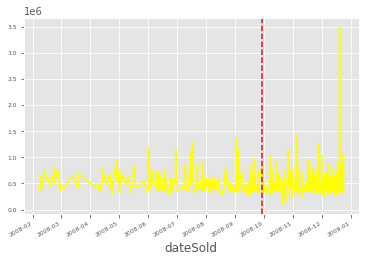

In [18]:
# plot the housing time series
ax = housingCrashFocused.plot(color='yellow', fontsize=6)

# add a red vertical line 
ax.axvline('2008-09-29', color='red', linestyle='--')

# show plot
plt.show()

### Analysing Prices per Month

We will then extract the months from the data set to understand what the average prices per month. We can see that November has the highest peak with the average prices of above $640,000. This suggest that the winter months of December, January and February are the lowest prices in the year. Also the middle of the year is interesting with the average prices in August being around $580,000 which is a lower point in the data. 

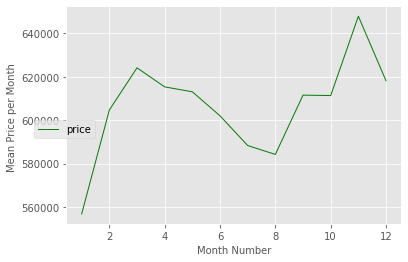

In [19]:

# extract the month from the index of housing prices
housing_month = housing['price'].index.month

# compute the mean housing prices for each month
price_by_month = housing['price'].groupby(housing_month).mean()

# plot the mean housing prices for each month in green
ax = price_by_month.plot(fontsize=10, linewidth=1, color='green')

# set axis labels and legend
ax.set_xlabel('Month Number', fontsize=10)
ax.set_ylabel('Mean Price per Month ', fontsize=10)
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10)

# show plot
plt.show()



### Analysing Prices per Year

Now we will then extract the year from the data set to find the average prices per year. We can see that 2008 has a downward hit in housing prices which would reflect the effects of the financial crash within that time. then we see an increase of pricees with a slight dip seen in 2011. Then the average prices reach a peak at $6750,000 in 2017 before falling again towards 2019. 


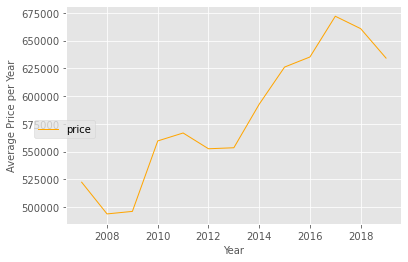

In [20]:
# extract of the year in each date 
housing_year = housing.index.year

# compute the mean housing prices for each year
housing_by_year = housing['price'].groupby(housing_year).mean()

# plot the mean housing prices for each year in orange
ax = housing_by_year.plot(fontsize=10, linewidth=1, color='orange')

# set axis labels and legend
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Average Price per Year', fontsize=10)
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10)

# show plot
plt.show()

### Finding Correlations

We will now look for correlations within the data and focus on understanding what could lead to the prices of homes in the US. First by creating a correlation matrix below.

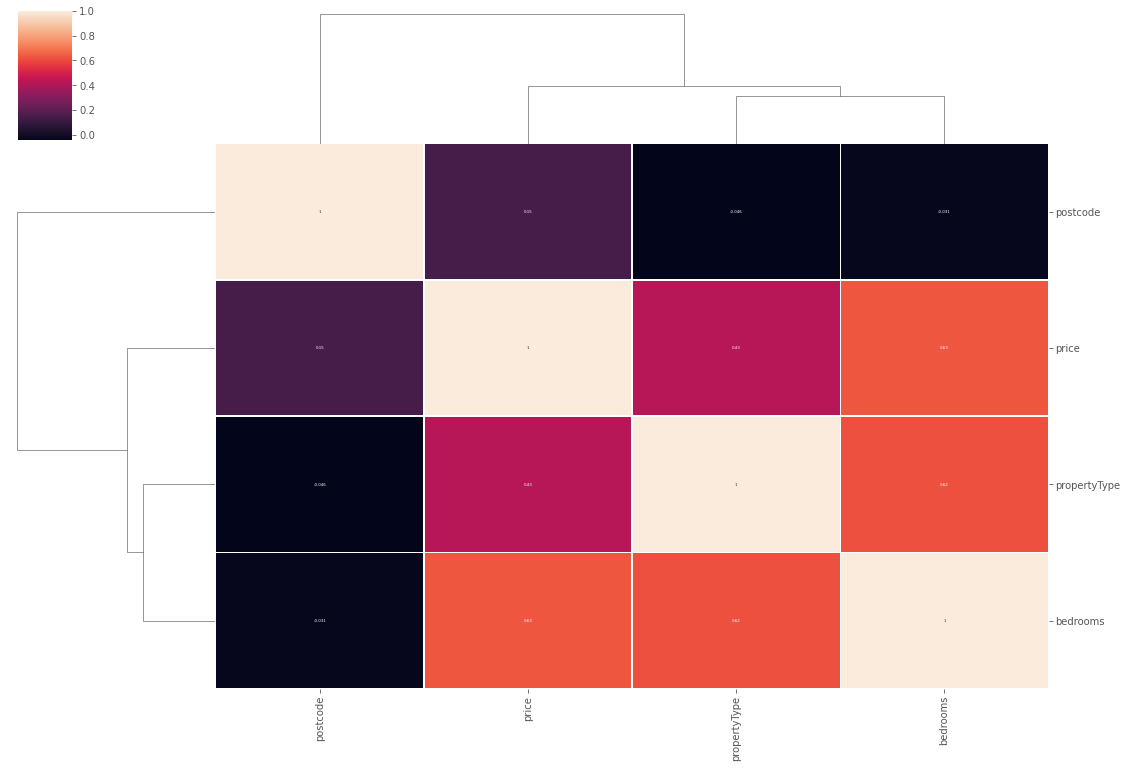

In [21]:
# get correlation matrix of the housing DataFrame
housing_corr = housing.corr(method='spearman')

# customize the clustermap of the housing correlation matrix
fig = sns.clustermap(housing_corr, annot=True, annot_kws={"size": 4}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)

# show the plot
plt.show()


The least amount of correlation is between property type and bedrooms. Property type and price also has very little correlation however postcode and property type has slightly more. There is higher correlation between postcode and price but the highest  correlation is between the housing prices and the bedrooms. We focus on statistics with the highest correlation in depth below.

### Statistics for Housing 

In [22]:
# calculate mean and median bedrooms in housing
print('The mean bedrooms of housing is', np.mean(housing['bedrooms']))
print('The median bedrooms of housing is', np.median(housing['bedrooms']))

# calculate mean and median housing prices
print('The mean of housing prices is', np.mean(housing['price']))
print('The median of housing prices is', np.median(housing['price']))

# count the number of units 
unitCount = housing[housing['propertyType']==0].count()
# count the number of houses 
houseCount = housing[housing['propertyType']==1].count()
# count the total number of properties in dataset
totalCount = housing['propertyType'].count()

# count the number of units in the data set which is represented by 0
print('Number of houses', unitCount)
# count the number of houses in the data set which is represented by 1
print('Number of houses', houseCount)
# calculate the percentage of properties that were houses in the dataset
print('Percentage of houses in data set', houseCount/totalCount)



The mean bedrooms of housing is 3.2501690331304935
The median bedrooms of housing is 3.0
The mean of housing prices is 609736.262204192
The median of housing prices is 550000.0
Number of houses datesold        5028
postcode        5028
price           5028
propertyType    5028
bedrooms        5028
dtype: int64
Number of houses datesold        24552
postcode        24552
price           24552
propertyType    24552
bedrooms        24552
dtype: int64
Percentage of houses in data set datesold        0.83002
postcode        0.83002
price           0.83002
propertyType    0.83002
bedrooms        0.83002
dtype: float64


We can see that the average bedrooms in the data set is around 3 bedrooms with the average price being $609736.26. After counting the 5028 units and 24552 houses in the dataset we can see that property type column has more houses. With 83% of the data set being houses. Because of this we will focus more on the difference in bedrooms makes to the prices as we can have .

         mean  median
price                
56500     4.0     4.0
62000     4.0     4.0
69000     3.0     3.0
74000     4.0     4.0
84000     3.0     3.0
...       ...     ...
5425000   4.0     4.0
5475000   5.0     5.0
6480000   3.0     3.0
7300000   5.0     5.0
8000000   4.0     4.0

[2554 rows x 2 columns]


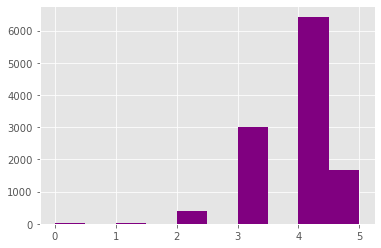

In [23]:
# group by prices, select bedrooms column, and compute mean and median
print(housing.groupby('price')['bedrooms'].agg([np.mean, np.median]))

# subset for prices that are above the mean value
aboveAverage = housing[housing['price'] > 609736.26]

# histogram of bedrooms for above average priced housing and show plot
aboveAverage['bedrooms'].hist(color = 'purple')

# show the plot
plt.show()


The histogram has is left-skewed means the data has a tail on the left side and is piled up higher on the right. But it shows most homes above the average price will have 4 bedrooms.

We can see that the there is a very small amount of houses with above average pricing. We will now explore the data set to see how many houses have zero bedrooms. 

In [24]:
#select houses with zero bedrooms
noRooms = housing[housing['bedrooms']==0]

#show the number of houses with zero bedrooms in the data set
print(noRooms.count())

#show the average price of a house with no bedrooms
print('The average price of a house with no bedrooms is', np.mean(noRooms['price']))

datesold        30
postcode        30
price           30
propertyType    30
bedrooms        30
dtype: int64
The average price of a house with no bedrooms is 542300.0


We can see that there is 30 places with no rooms in the dataset with the average house with no room being $542300